In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [207]:
# DDoS_attack_data = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
#Friday-WorkingHours-Afternoon-DDos.pcap_ISCX TCP-SYNC DATASET
chunksize = 100000
chunks = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", chunksize=chunksize)

# Combine processed chunks into a single DataFrame
processed_chunks = []
for chunk in chunks:
    processed_chunks.append(chunk)
DDoS_attack_data = pd.concat(processed_chunks, ignore_index=True)

In [208]:
DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [209]:
DDoS_attack_data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [210]:
DDoS_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [211]:
DDoS_attack_data.shape

(225745, 79)

In [212]:
#DDoS_attack_data["Label"].unique()

DDoS_attack_data = DDoS_attack_data.drop_duplicates()

# Pre-Processing

In [213]:
DDoS_attack_data.columns = DDoS_attack_data.columns.str.strip()

In [214]:

DDoS_attack_data.isna().sum().sum()

list(DDoS_attack_data.columns[DDoS_attack_data.isna().sum() > 0])

DDoS_attack_data = DDoS_attack_data.dropna()

In [215]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0',
    'Flow ID',
    'Src IP','Source IP',
    'Dst IP',
    'Source Port', 
    'Destination IP',
    # 'Protocol', 
    'Timestamp', 
    # 'SimillarHTTP',
    # 'Inbound',
    
]

# Check for columns that exist in the dataset and drop them
columns_to_remove = list(set(columns_to_drop).intersection(set(DDoS_attack_data.columns)))
DDoS_attack_data = DDoS_attack_data.drop(columns=columns_to_remove, errors='ignore')

# Display the first few rows of the updated DataFrame
DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [216]:
def clean_label(x):
    if x == "BENIGN":
        return 0
    else:
        return 1
        
DDoS_attack_data["Label_cleaned"] =  DDoS_attack_data["Label"].apply(clean_label)

DDoS_attack_data = DDoS_attack_data.drop(columns = ["Destination Port","Label"])



In [217]:
import pandas as pd
import numpy as np  # Import NumPy directly

# Function to identify and remove correlated features
def remove_correlated_features(dataset, threshold=0.8):
    # Compute the correlation matrix
    corr_matrix = dataset.corr().abs()
    
    # Create a mask to identify the upper triangle of the matrix
    upper_tri = corr_matrix.where(
        ~np.tril(np.ones(corr_matrix.shape)).astype(bool)
    )
    
    # Find the indices of columns to drop
    to_drop = [
        column for column in upper_tri.columns
        if any(upper_tri[column] > threshold)
    ]
    
    # Drop the correlated columns
    dataset_cleaned = dataset.drop(columns=to_drop)
    
    return dataset_cleaned, to_drop

# Example usage
# Assuming `DDoS_attack_data` is your DataFrame
threshold = 0.8  # Set the threshold
DDoS_attack_data, removed_features = remove_correlated_features(DDoS_attack_data, threshold)

# Output the results
print("Removed Correlated Features:", removed_features)
# print("Data Frame after Removing Correlated Features:")
# print(DDoS_attack_data.head())


Removed Correlated Features: ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


In [218]:

DDoS_attack_data.head()

,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,...,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label_cleaned
0,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,0,0,0,33,-1,20,0.0,0.0,0.0,0
1,109,1,6,6,6,6,1.100917e+05,18348.62385,109.0,109,...,0,0,0,29,256,20,0.0,0.0,0.0,0
2,52,1,6,6,6,6,2.307692e+05,38461.53846,52.0,52,...,0,0,0,29,256,20,0.0,0.0,0.0,0
3,34,1,6,6,6,6,3.529412e+05,58823.52941,34.0,34,...,0,0,0,31,329,20,0.0,0.0,0.0,0
4,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,0,0,0,32,-1,20,0.0,0.0,0.0,0


In [219]:

# Select only numeric columns for the check
numeric_cols = DDoS_attack_data.select_dtypes(include=[np.number])

# Check for infinite values in numeric columns
inf_values_count = np.isinf(numeric_cols).sum().sum()
print(f"Number of infinite values in the numeric columns: {inf_values_count}")

# If there are infinite values, replace them with NaN
DDoS_attack_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
missing_values_count = DDoS_attack_data.isnull().sum().sum()
print(f"Number of missing values: {missing_values_count}")


Number of infinite values in the numeric columns: 52
Number of missing values: 52


In [220]:


# Filter out rows with infinities
DDoS_attack_data = DDoS_attack_data[~np.isinf(numeric_cols).any(axis=1)]

# Remove columns with a single unique value
DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

# Display the head of the cleaned dataset
DDoS_attack_data.head()


,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,...,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label_cleaned
0,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,1,0,0,33,-1,20,0.0,0.0,0.0,0
1,109,1,6,6,6,6,1.100917e+05,18348.62385,109.0,109,...,1,1,1,29,256,20,0.0,0.0,0.0,0
2,52,1,6,6,6,6,2.307692e+05,38461.53846,52.0,52,...,1,1,1,29,256,20,0.0,0.0,0.0,0
3,34,1,6,6,6,6,3.529412e+05,58823.52941,34.0,34,...,1,1,1,31,329,20,0.0,0.0,0.0,0
4,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,1,0,0,32,-1,20,0.0,0.0,0.0,0


In [221]:
benign_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 0]
DDoS_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 1]

#bengin_df = benign_df.head(1000)
#DDoS_df = DDoS_df.head(1000)

bengin_df = benign_df.head(1000)
DDoS_df = DDoS_df.head(1000)

DDoS_attack_data = pd.concat([bengin_df, DDoS_df], axis = 0)

DDoS_attack_data.head(10)

,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,...,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label_cleaned
0,3,2,12,6,0,0,4.000000e+06,666666.666700,3.0,3,...,1,0,0,33,-1,20,0.0,0.0,0.0,0
1,109,1,6,6,6,6,1.100917e+05,18348.623850,109.0,109,...,1,1,1,29,256,20,0.0,0.0,0.0,0
2,52,1,6,6,6,6,2.307692e+05,38461.538460,52.0,52,...,1,1,1,29,256,20,0.0,0.0,0.0,0
3,34,1,6,6,6,6,3.529412e+05,58823.529410,34.0,34,...,1,1,1,31,329,20,0.0,0.0,0.0,0
4,3,2,12,6,0,0,4.000000e+06,666666.666700,3.0,3,...,1,0,0,32,-1,20,0.0,0.0,0.0,0
5,1022,2,12,6,0,0,1.174168e+04,1956.947162,1022.0,1022,...,1,0,0,32,-1,20,0.0,0.0,0.0,0
6,4,2,12,6,0,0,3.000000e+06,500000.000000,4.0,4,...,1,0,0,32,-1,20,0.0,0.0,0.0,0
7,42,1,6,6,6,6,2.857143e+05,47619.047620,42.0,42,...,1,0,1,32,256,20,0.0,0.0,0.0,0
8,4,2,12,6,0,0,3.000000e+06,500000.000000,4.0,4,...,1,0,0,32,-1,20,0.0,0.0,0.0,0
9,4,2,37,6,0,0,9.250000e+06,500000.000000,4.0,4,...,1,0,0,946,-1,20,0.0,0.0,0.0,0


In [222]:


DDoS_attack_data = DDoS_attack_data.sample(frac=1, random_state=42).reset_index(drop=True)

DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

In [223]:
DDoS_attack_data.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Fwd PSH Flags', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Idle Std',
       'Label_cleaned'],
      dtype='object')

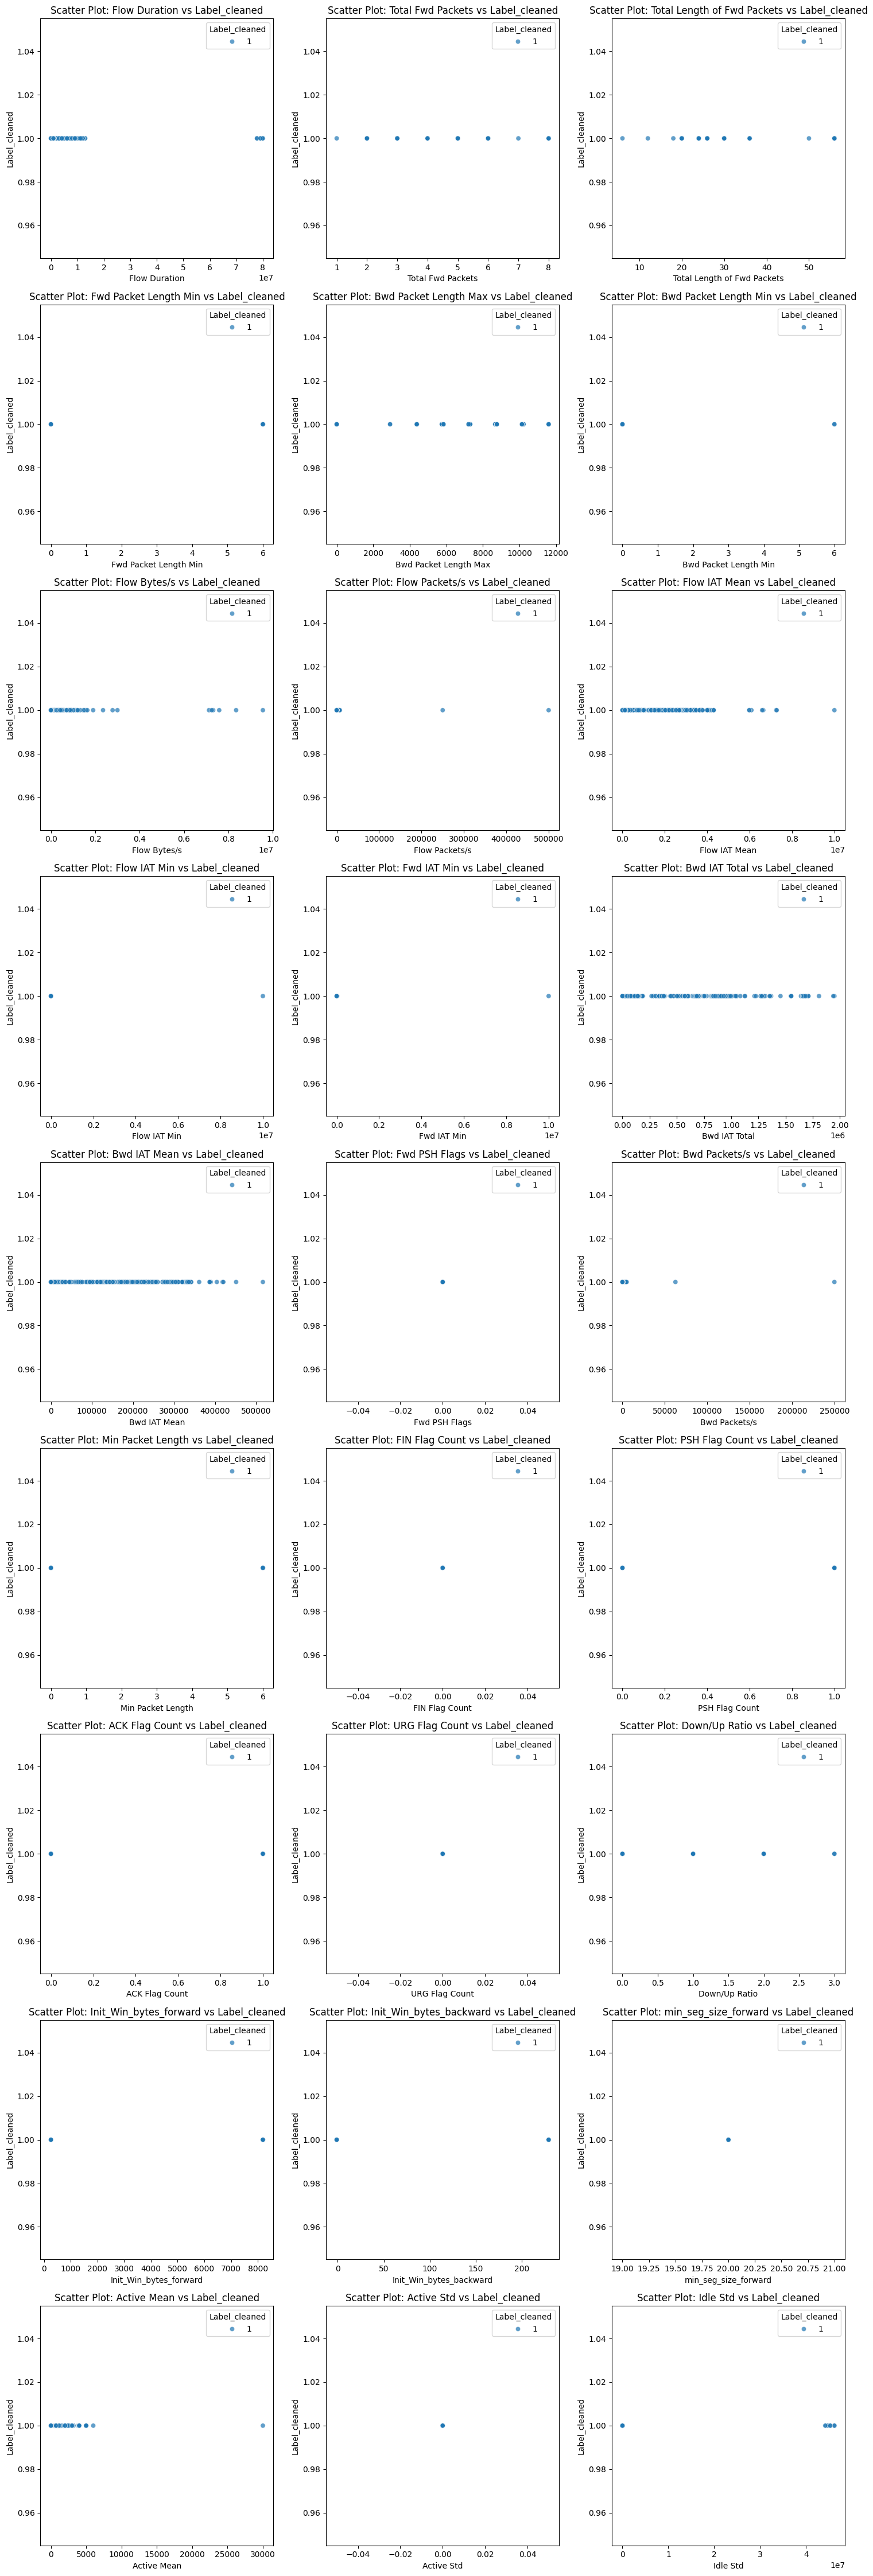

In [224]:
data = DDoS_attack_data

# Filter for attack data (Label_cleaned == 1 for attacks)
attack_data = data[data["Label_cleaned"] == 1]

# Scatter plot for all features
def plot_scatter_for_features(data, target_column):
    features = [col for col in data.columns if col != target_column]
    rows = len(features) // 3 + (1 if len(features) % 3 != 0 else 0)

    plt.figure(figsize=(15, rows * 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, 3, i)
        sns.scatterplot(data=data, x=feature, y=target_column, hue=target_column, alpha=0.7)
        plt.title(f"Scatter Plot: {feature} vs {target_column}")
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.tight_layout()

# Plot scatter plots for all features
plot_scatter_for_features(attack_data, "Label_cleaned")
plt.show()

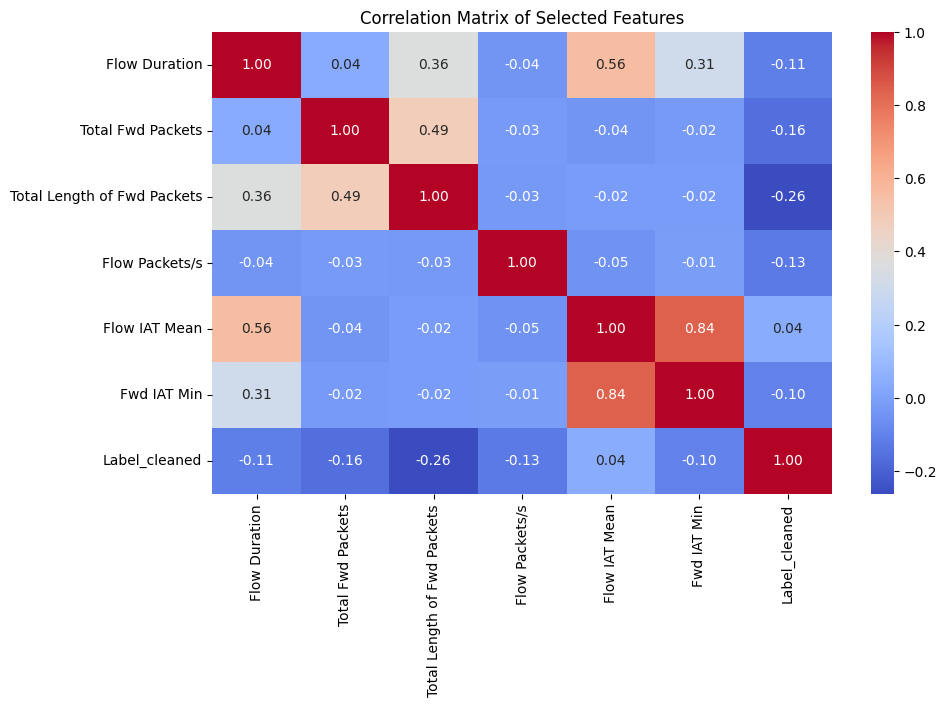

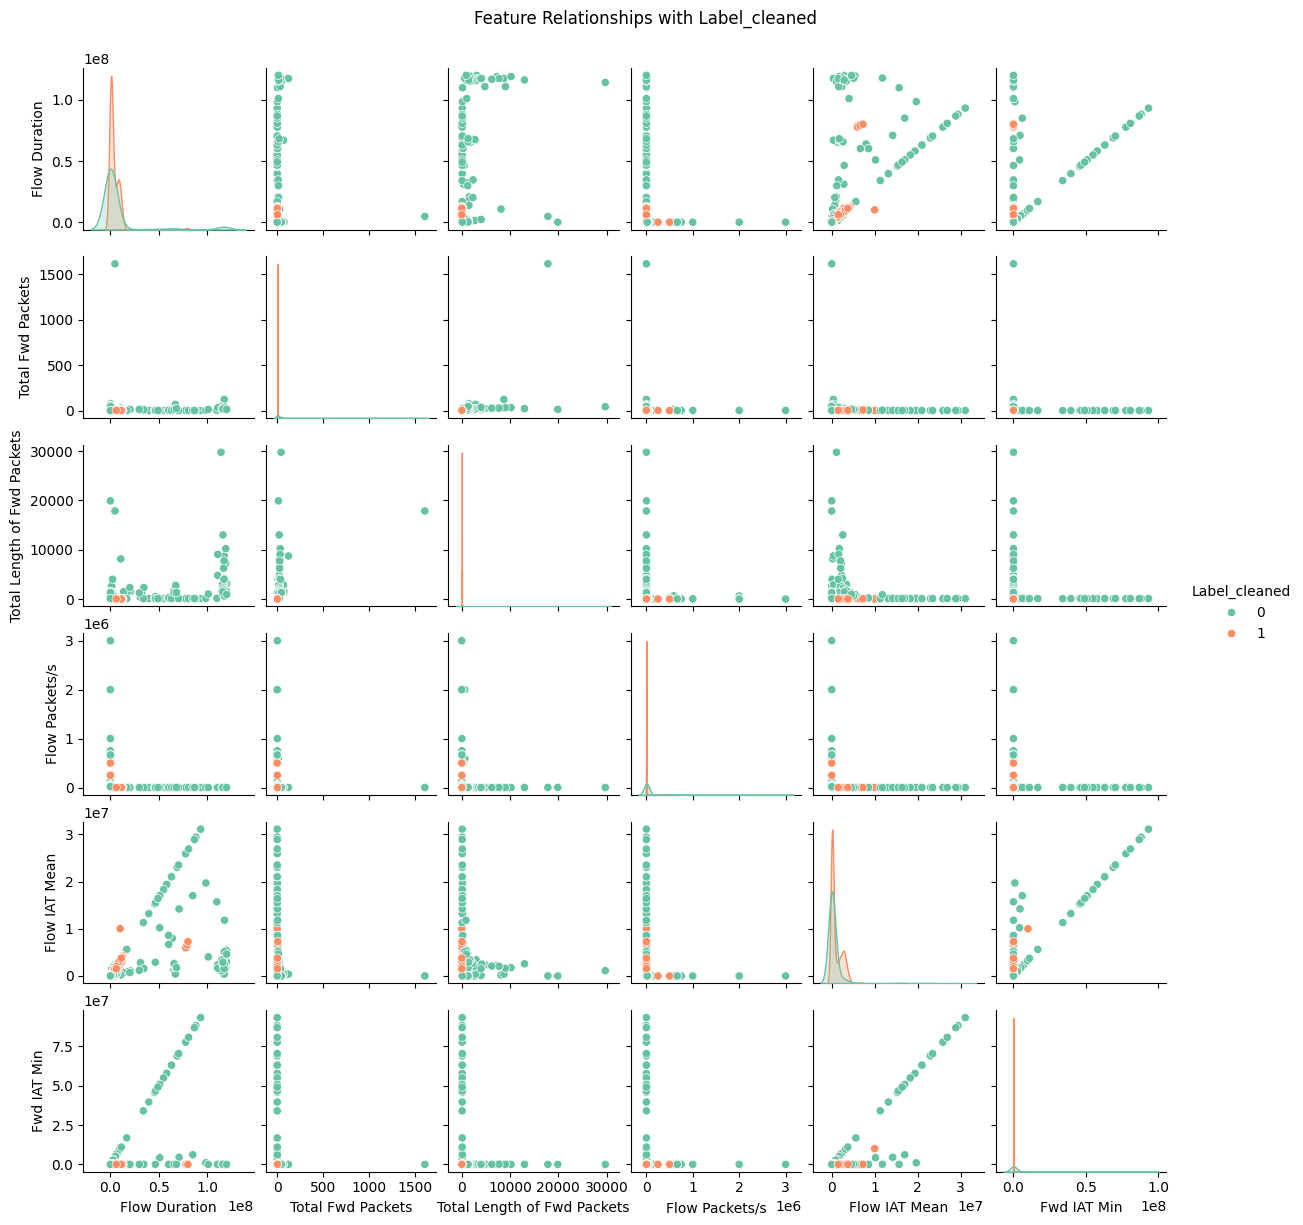

In [225]:
# Corrected list of features to analyze
features_to_analyze = [
    "Flow Duration",
    "Total Fwd Packets",
    "Total Length of Fwd Packets",
    "Flow Packets/s",
    "Flow IAT Mean",
    "Fwd IAT Min",
    "Label_cleaned",
]

# Filter the data to include only the features to analyze
filtered_data = DDoS_attack_data[features_to_analyze]

# 1. Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# 2. Pairplot (Scatter Plots for All Features with Label)
sns.pairplot(filtered_data, hue="Label_cleaned", palette="Set2", diag_kind="kde", height=2)
plt.suptitle("Feature Relationships with Label_cleaned", y=1.02)
plt.show()


In [226]:
# Define feature (X) and target (Y) data
X = DDoS_attack_data.drop(columns=["Label_cleaned"]).values  # Feature data
Y = DDoS_attack_data["Label_cleaned"].values  # Target data

# Define split ratios
nb_train = int(len(DDoS_attack_data) * 0.6)  # 60% for training
nb_val = int(len(DDoS_attack_data) * 0.2)   # 20% for validation
nb_test = len(DDoS_attack_data) - nb_train - nb_val  # Remaining for testing

# Splitting the data
X_train = X[:nb_train]
Y_train = Y[:nb_train]

X_val = X[nb_train:nb_train + nb_val]
Y_val = Y[nb_train:nb_train + nb_val]

X_test = X[nb_train + nb_val:]
Y_test = Y[nb_train + nb_val:]


In [227]:
# print(DDoS_attack_data.columns)
# print(X)

print("Features shape:", X.shape)
print("Y shape:", Y.shape)

Features shape: (2000, 27)
Y shape: (2000,)


In [228]:
label_encoder = LabelEncoder()
DDoS_attack_data["Label_cleaned"] = label_encoder.fit_transform(DDoS_attack_data["Label_cleaned"])



In [229]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each non-numeric column
for column in DDoS_attack_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    DDoS_attack_data[column] = le.fit_transform(DDoS_attack_data[column])


In [230]:
# DDoS_attack_data = pd.get_dummies(X, drop_first=True)


In [231]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(X)

In [232]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
acc_def = accuracy_score(Y_test, y_pred)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 0.998


In [233]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the K-Fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(rf, X, Y, cv=kf)

# Print the results
print("Cross-validation scores:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())


Cross-validation scores: [1.     1.     0.995  1.     0.9975]
Mean accuracy: 0.9984999999999999


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       182
           1       1.00      1.00      1.00       218

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[182   0]
 [  1 217]]
Accuracy Score: 0.9975


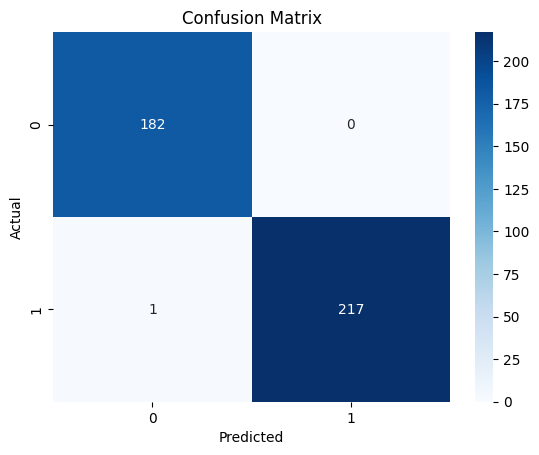

In [234]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred))

# Visualization: Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [235]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# pca = PCA(n_components = 5)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# model = RandomForestClassifier(
#     #n_estimators=500,          # Number of trees
#     #max_depth=50,              # Limit tree depth
#     #min_samples_split=30,       # Minimum samples to split a node
#     #min_samples_leaf=15,        # Minimum samples in a leaf node
#     #max_features='sqrt',       # Consider sqrt of total features for each split
#     random_state=42
# )
# model.fit(X_train_pca, Y_train)

# y_pred_pca = model.predict(X_test_pca)

# acc_def = accuracy_score(Y_test, y_pred_pca)
# print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

In [236]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import LinearSVC


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model =LinearSVC()#SVC(class_weight='balanced')
svm_model.fit(X_train_scaled, Y_train)




LinearSVC()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.99      1.00      0.99       218

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Accuracy Score: 0.99
Confusion Matrix:


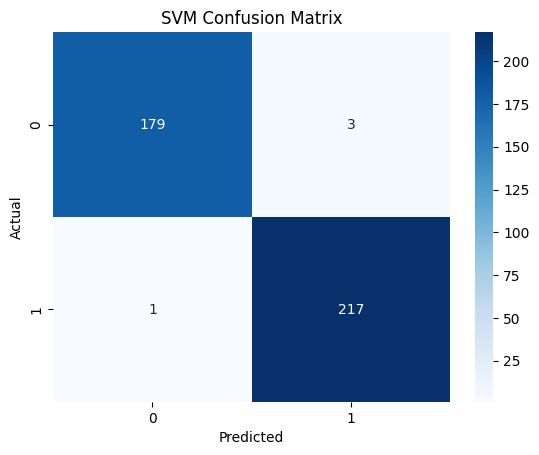

In [237]:

print("SVM Classification Report:")
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(Y_test, svm_predictions))



print("Accuracy Score:", accuracy_score(Y_test, svm_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [238]:
DDoS_attack_data.to_csv('data/processed_data.csv', index=False)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.98      1.00      0.99       218

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400

Accuracy Score: 0.985
Confusion Matrix:


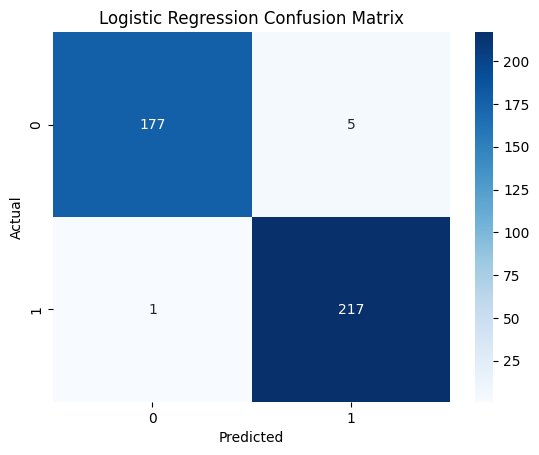

ROC-AUC Score: 0.9959421312632323


In [239]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model with hyperparameter constraints
log_reg_model = LogisticRegression(
    penalty='l2',   # Regularization type (l1 or l2)
    C=1.0,          # Inverse of regularization strength (lower values mean stronger regularization)
    solver='lbfgs', # Optimization algorithm (lbfgs, saga, etc.)
    max_iter=1000   # Maximum number of iterations
)

# Train the model
log_reg_model.fit(X_train_scaled, Y_train)

# Make predictions
log_reg_predictions = log_reg_model.predict(X_test_scaled)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_reg_predictions))

# Accuracy Score
print("Accuracy Score:", accuracy_score(Y_test, log_reg_predictions))
 
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: ROC-AUC Score
log_reg_probs = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(Y_test, log_reg_probs)
print("ROC-AUC Score:", roc_auc)


In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Step 4: Build the CNN Model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.25),  # Prevent overfitting
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Second convolutional layer
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),  # Flatten the 3D output to 1D
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(X_train_scaled[..., np.newaxis], Y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled[..., np.newaxis], Y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
Y_pred = (model.predict(X_test_scaled[..., np.newaxis]) > 0.5).astype("int32")


Epoch 1/10
15/15 [==============================] - 2s 34ms/step - loss: 0.6671 - accuracy: 0.6635 - val_loss: 0.6358 - val_accuracy: 0.7000
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5795 - accuracy: 0.7781 - val_loss: 0.5322 - val_accuracy: 0.7333
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 0.4619 - accuracy: 0.8135 - val_loss: 0.4131 - val_accuracy: 0.8083
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.3385 - accuracy: 0.8750 - val_loss: 0.3304 - val_accuracy: 0.9125
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.2479 - accuracy: 0.9240 - val_loss: 0.2752 - val_accuracy: 0.9333
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.2014 - accuracy: 0.9448 - val_loss: 0.2865 - val_accuracy: 0.9292
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 0.1732 - accuracy: 0.9573 - val_loss: 0.2606 - val_accuracy: 0.9333
Epoch 8/10
15/15 [

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       182
           1       0.96      1.00      0.98       218

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



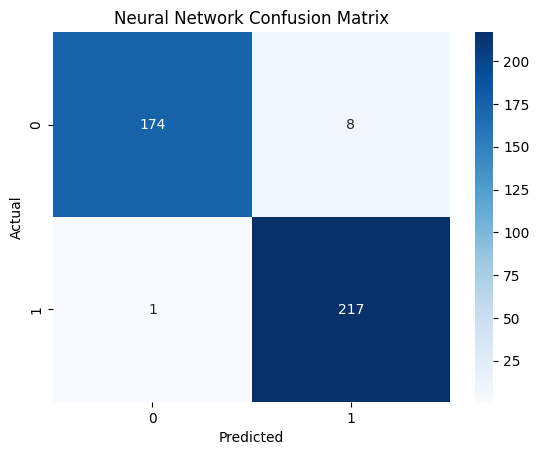

Neural Network Model saved as 'neural_network_model.pkl'.


In [241]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Save the Model as a .pkl File
import pickle
with open("model/neural_network_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Neural Network Model saved as 'neural_network_model.pkl'.")


In [242]:
import pickle

# Save the trained model to a pickle file
pickle_file_path = "model/rf_model.pkl"  
with open(pickle_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {pickle_file_path}")

Model saved as model/rf_model.pkl


In [243]:
with open('model/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


In [244]:
with open('model/log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

In [245]:
import os

validation_data = pd.DataFrame(X_val, columns=DDoS_attack_data.drop(columns=["Label_cleaned"]).columns)
validation_data["Label_cleaned"] = Y_val

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save the validation data to CSV
validation_data.to_csv("data/validation.csv", index=False)

print("Validation data saved as 'data/validation.csv'")

Validation data saved as 'data/validation.csv'


In [246]:
# from sklearn.ensemble import StackingClassifier

# base_models = [
#     ('svm', SVC(probability=True, kernel='linear', random_state=42)),
#     ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
# ]

# # Define meta-model
# meta_model = LogisticRegression()

# # Create StackingClassifier
# stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
# stacked_model.fit(X_train, Y_train)

# # Evaluate the hybrid model
# Y_pred = stacked_model.predict(X_test)
# print("Hybrid Model Accuracy:", accuracy_score(Y_test, Y_pred))
# print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

In [247]:


# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the scaler and apply it to the test data
with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
X_val_scaled = loaded_scaler.transform(X_val)


13/13 [==============================] - 0s 4ms/step


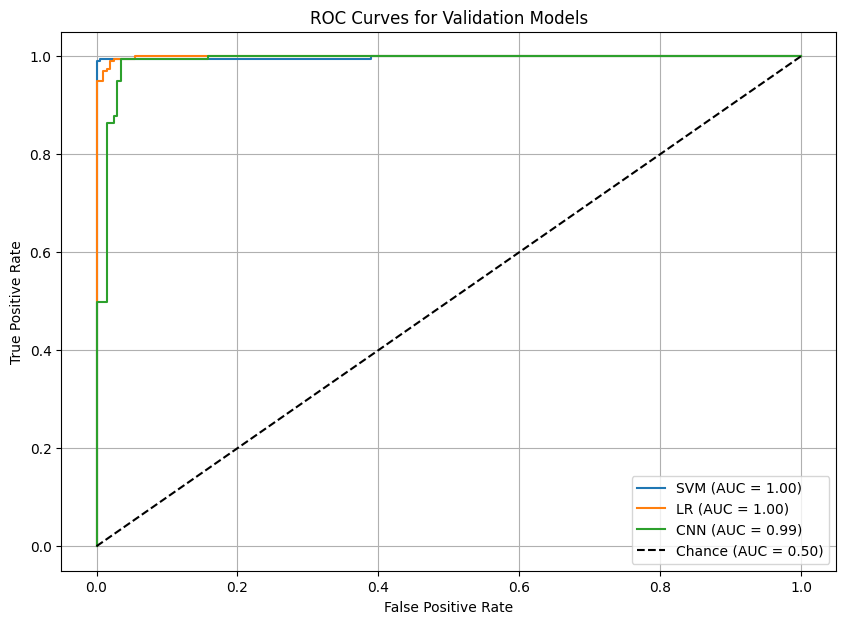

Model Performance:
SVM: AUC = 1.00, Accuracy = 0.98
LR: AUC = 1.00, Accuracy = 0.97
CNN: AUC = 0.99, Accuracy = 0.98


In [248]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Scale the validation data directly using MinMaxScaler
scaler = MinMaxScaler()
X_val_scaled = scaler.fit_transform(X_val)  # Scale X_val directly

# Load and evaluate models
model_paths = {
    "SVM": "model/svm_model.pkl",
    "LR": "model/log_reg_model.pkl",
    "CNN": "model/neural_network_model.pkl",
}

roc_auc_scores = {}
accuracy_scores = {}

plt.figure(figsize=(10, 7))
for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Predict probabilities and labels
    if hasattr(model, "decision_function"):  # For SVM or similar models
        y_probs = model.decision_function(X_val_scaled)
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict_proba"):  # For models like Logistic Regression
        y_probs = model.predict_proba(X_val_scaled)[:, 1]
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict"):  # For Keras Sequential or similar models
        y_probs = model.predict(X_val_scaled).ravel()  # Ensure 1D array
        y_preds = (y_probs > 0.5).astype(int)  # Threshold for binary classification
    else:
        raise AttributeError(f"{model_name} does not support prediction methods.")
    
    # Compute metrics
    roc_auc = roc_auc_score(Y_val, y_probs)
    accuracy = accuracy_score(Y_val, y_preds)

    roc_auc_scores[model_name] = roc_auc
    accuracy_scores[model_name] = accuracy

    # Compute and plot ROC curve
    fpr, tpr, _ = roc_curve(Y_val, y_probs)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Validation Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print model performance
print("Model Performance:")
for model_name in roc_auc_scores.keys():
    print(f"{model_name}: AUC = {roc_auc_scores[model_name]:.2f}, Accuracy = {accuracy_scores[model_name]:.2f}")